(1460, 9)
   Order  area   price  OverallQual  OverallCond  YearBuilt  BsmtFinSF1  \
0      1  1710  208500            7            5       2003         706   
1      2  1262  181500            6            8       1976         978   
2      3  1786  223500            7            5       2001         486   
3      4  1717  140000            7            5       1915         216   
4      5  2198  250000            8            5       2000         655   

   X1stFlrSF  X2ndFlrSF  
0        856        854  
1       1262          0  
2        920        866  
3        961        756  
4       1145       1053  


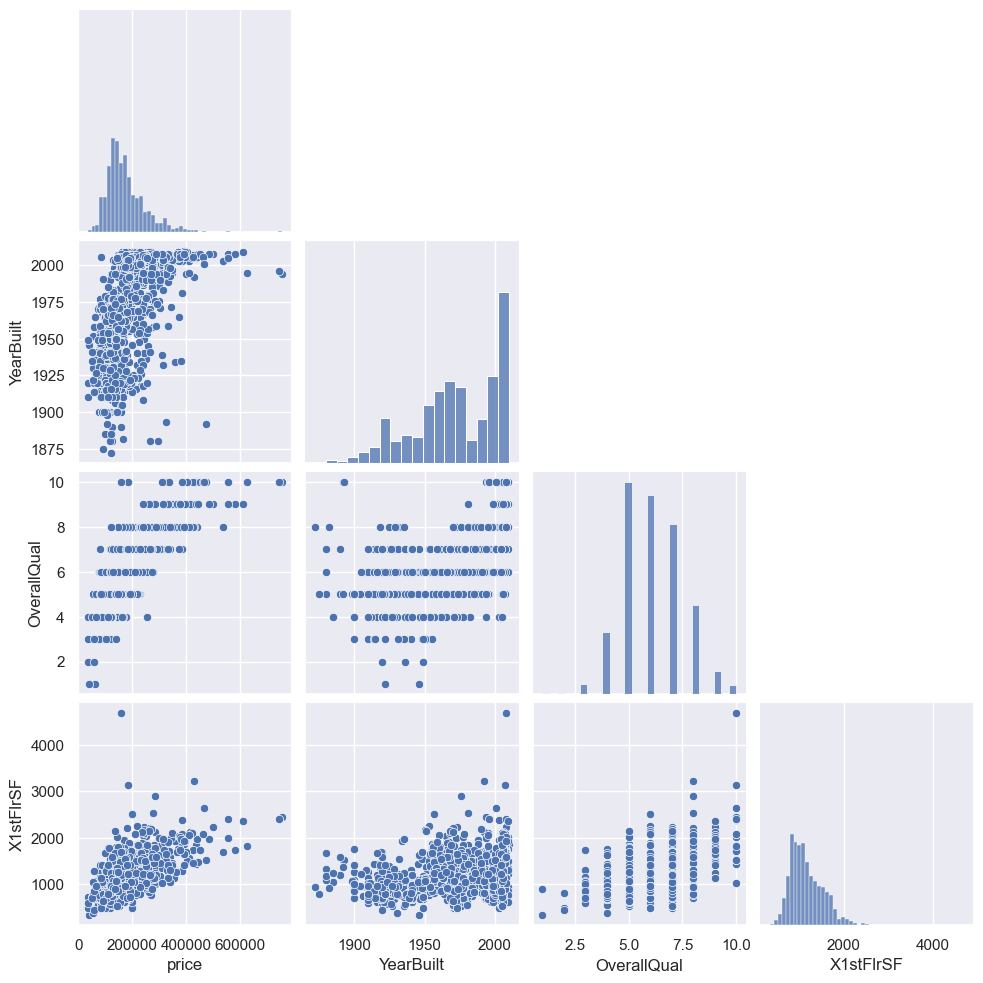

Model1 AIC: 36625.70646748859
Model2 AIC: 35367.18730733775
Model3 AIC: 35336.629042057226
Best model: Model3
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1134.
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:00:09   Log-Likelihood:                -17664.
No. Observations:                1460   AIC:                         3.534e+04
Df Residuals:                    1456   BIC:                         3.536e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [1]:
# ライブラリ
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

sns.set_theme()

# データ読み込み
df = pd.read_csv("iowa_ames_housing_revised.csv")
print(df.shape)
print(df.head())

# ペアプロット
sns.pairplot(df[["price","YearBuilt","OverallQual","X1stFlrSF"]], corner=True)
plt.show()

# モデル1: YearBuilt
m1 = smf.ols("price ~ YearBuilt", data=df).fit()

# モデル2: OverallQual + X1stFlrSF
m2 = smf.ols("price ~ OverallQual + X1stFlrSF", data=df).fit()

# モデル3: YearBuilt + OverallQual + X1stFlrSF
m3 = smf.ols("price ~ YearBuilt + OverallQual + X1stFlrSF", data=df).fit()

# AICの比較
print("Model1 AIC:", m1.aic)
print("Model2 AIC:", m2.aic)
print("Model3 AIC:", m3.aic)

# 最適モデルの判定
models = {"Model1": m1, "Model2": m2, "Model3": m3}
best = min(models, key=lambda k: models[k].aic)
print("Best model:", best)

# 最適モデルの詳細
print(models[best].summary())
